## Simulación para futuros con Black-Scholes-Merton

$S_t=S_0 \space exp((r-\frac{1}{2}\sigma^2)T+\sigma\sqrt{T}z) $
* $S_T$: Nivel del índice en el periodo T
* $r$: Tasa corta constante y sin riesgo
* $\sigma$: volatilidad constante (desviación estándar de retornos) de S
* $z$: v.a. de Normal estándar

In [1]:
import numpy as np
import numpy.random as npr
import math
from pylab import plt, mpl
import scipy.stats as scs

Text(0, 0.5, 'frequency')

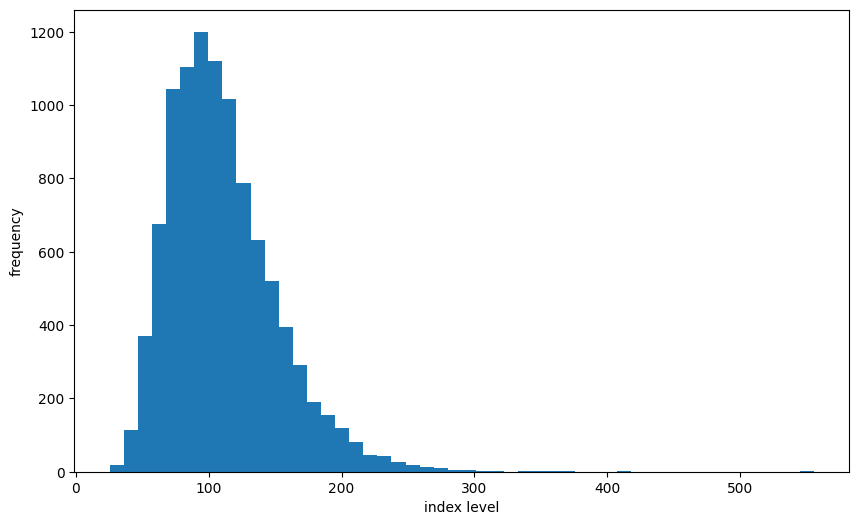

In [2]:
# Parámetros iniciales
S0 = 100  # Nivel del Índice Inicial
r = 0.05 
sigma = 0.25
T = 2  # The horizon in year fractions
I = 10000

# Se realiza una simulación sobre Distribucuión Normal Estándar con los parámetros anteriores
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))

plt.figure(figsize = (10, 6))
plt.hist(ST1, bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

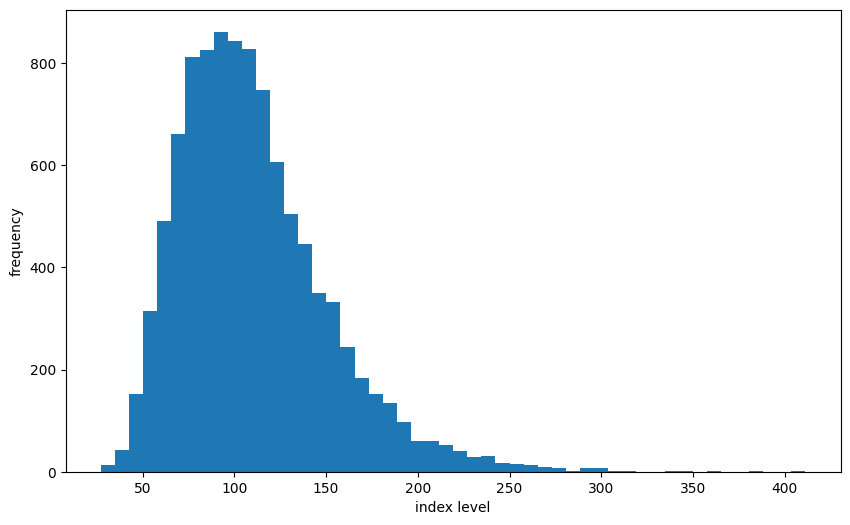

In [3]:
# Se realiza una simulación sobre Distribucuión Log-Normal con los parámetros anteriores
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T, sigma * np.sqrt(T), size = I)

plt.figure(figsize = (10, 6))
plt.hist(ST2, bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')

Las Simulaciones anteriores son muy parecidas. Para validarlo, hay que comparar los momentos de dichas variables

In [4]:
# Función para comparar 2 simulaciones
def print_statistics(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [5]:
# Comparar las simulaciones anteriores
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         25.401         27.269
           max        555.900        411.217
          mean        110.505        110.340
           std         40.621         40.721
          skew          1.185          1.169
      kurtosis          3.427          2.480


## Procesos Estocásticos

Un proceso estocástico es una secuencia de variables aleatorias. En ese sentido, uno debería esperar algo similar a una secuencia de simulaciones repetidas de una variable aleatoria al simular un proceso. Esto es principalmente cierto, aparte del hecho de que "los sorteos normalmente no son independientes sino que dependen del resultado de los sorteos anteriores". Sin embargo, en general, los procesos estocásticos utilizados en finanzas exhiben la "propiedad de Markov", que dice principalmente que "el valor del proceso en el futuro sólo depende del estado actual del proceso", y no de ningún otro estado más “histórico” o incluso de toda la historia del proceso. El proceso también se denomina sin memoria.

## Movimiento Geométrico Browniano

Si se considera el modelo Black-Scholes-Merton como una "Ecuación Diferencial Estocástica (SDE)" $\\$
$dS_t=rS_tdt+\sigma S_tdZ_t$ $\\$
$Z$: Movimiento estándar Browniano
$\\$ 
La SDE puede ser discretizada por un esquema de Euler $\\$

### Simulación dinámica de niveles de índice en la configuración Black-Scholes-Merton
$S_t=S_{t-\Delta t} \space exp((r-\frac{1}{2}\sigma^2)\Delta t+\sigma\sqrt{\Delta t}z_t)$

Text(0, 0.5, 'frequency')

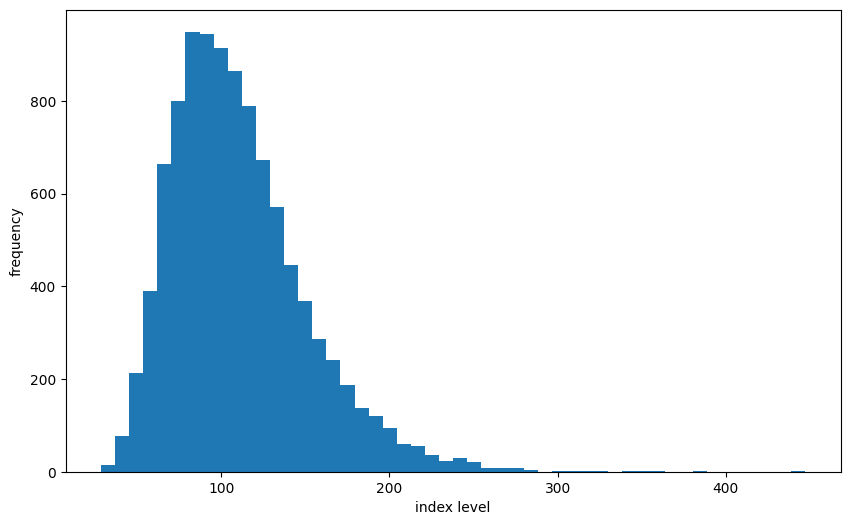

In [6]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(I))

plt.figure(figsize = (10, 6))
plt.hist(S[-1], bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [7]:
# Si se comparan nuevamente las simulaciones, son muy parecidas
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         28.381         27.269
           max        447.383        411.217
          mean        110.494        110.340
           std         39.927         40.721
          skew          1.074          1.169
      kurtosis          2.180          2.480


## Difusión Raíz Cuadrada

Otra clase importante de procesos financieros son los procesos de "reversión de la media", que se utilizan para modelar tipos de interés a corto plazo o procesos de volatilidad, por ejemplo. Un modelo popular y ampliamente utilizado es la difusión de raíz cuadrada.

### Ecuación diferencial estocástica para Difusión Raíz Cuadrada
$dx_t=k (\theta-x_t)dt+\sigma\sqrt{x_t}dZ_t)$
* $x_t$: Nivel del proceso en la fecha t (distribuidos con $\chi^2$)
* $k$: Factor de reversión de la media
* $\theta$: Media a largo plazo del proceso
* $\sigma$: Parámetro constante de volatilidad
* $Z_t$: Movimiento estándar Browniano

### Discretización de Euler para Difusión Raíz Cuadrada
$\tilde{x}_t=\tilde{x}_s+k (\theta-\tilde{x}_s^+)\Delta t+\sigma \sqrt{\tilde{x}_s^+} \sqrt{\Delta t}z_t$

In [8]:
# Simulación con esquema de Euler
x0 = 0.05
kappa = 3
theta = 0.02
sigma = 0.1
I = 10000
M = 50
dt = T / M

In [9]:
# Función Estándar de Euler
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt) * npr.standard_normal(I))
    x = np.maximum(xh, 0)
    return x

x1 = srd_euler()
x1

array([[0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.04990918, 0.04718798, 0.04373633, ..., 0.03690243, 0.04724056,
        0.04739871],
       [0.04930849, 0.04359681, 0.03857022, ..., 0.03202633, 0.04450133,
        0.04214227],
       ...,
       [0.02285557, 0.0148728 , 0.01104361, ..., 0.01734242, 0.03279405,
        0.01326447],
       [0.02105446, 0.01553877, 0.01388682, ..., 0.01842647, 0.03017371,
        0.01412318],
       [0.02453458, 0.01477971, 0.01339948, ..., 0.0170159 , 0.0292917 ,
        0.01713103]])

Text(0.5, 1.0, 'Simulación dinámica de la difusión raíz cuadrada en Maturity')

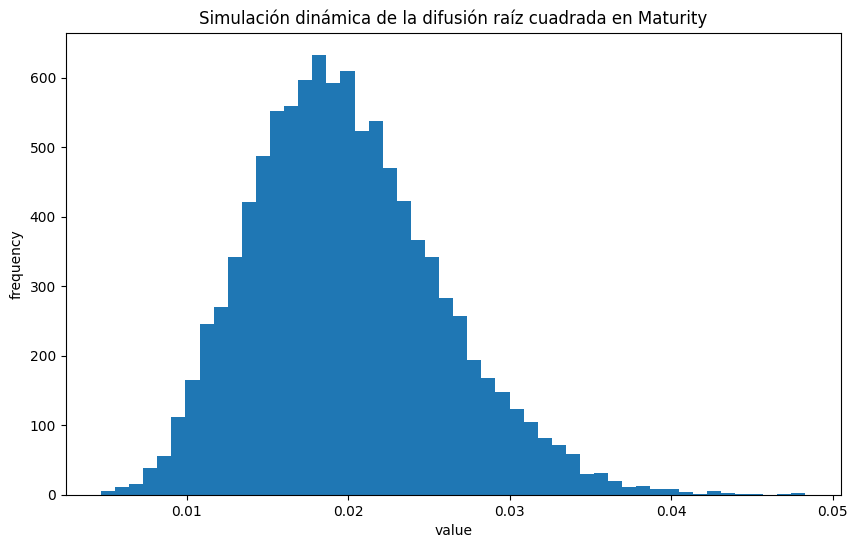

In [10]:
plt.figure(figsize = (10, 6))
plt.hist(x1[-1], bins = 50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title("Simulación dinámica de la difusión raíz cuadrada en Maturity")

Text(0, 0.5, 'index level')

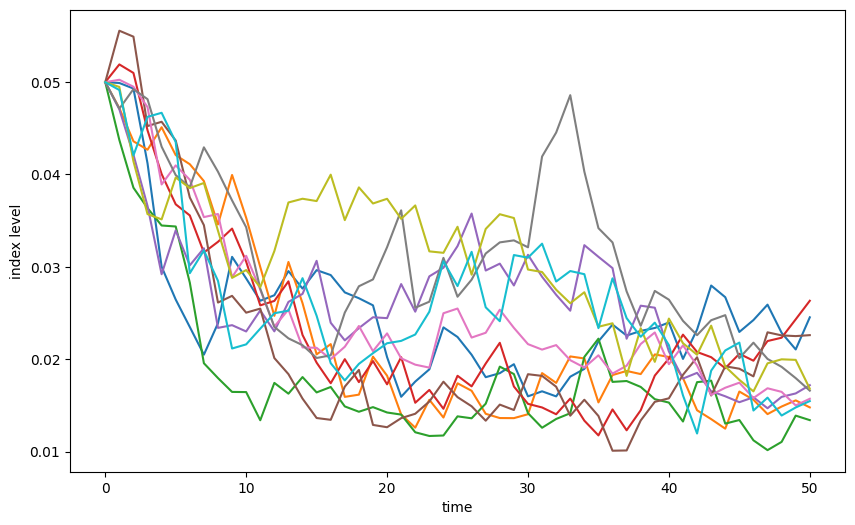

In [11]:
plt.figure(figsize = (10, 6))
plt.plot(x1[:, :10], lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')

## Volatilidad estocástica

Uno de los principales supuestos simplificadores del modelo Black-Scholes-Merton es la volatilidad constante. Sin embargo, la volatilidad en general no es constante ni determinista: es estocástica. Por lo tanto, a principios de la década de 1990 se logró un avance importante con respecto a la modelización financiera con la introducción de los llamados modelos de volatilidad estocástica.

### Ecuación diferencial estocástica para el modelo de volatilidad estocástica de Heston

$dS_t=rS_tdt+\sqrt{v_t} S_tdZ_t^1 \\$
$dv_t=k_v(\theta_v-v_t)dt+\sigma_v\sqrt{v_t} dZ_t^2 \\$
$dZ_t^1dZ_t^2 = \rho \\$
$\rho$ representa la correlación entre los dos movimientos brownianos estándar de $dZ_t^1,dZ_t^2 \\$
Esto nos permite explicar un hecho estilizado llamado efecto apalancamiento, que en esencia establece que la volatilidad aumenta en tiempos de tensión (mercados en declive) y disminuye en tiempos de mercado alcista (mercados en alza).

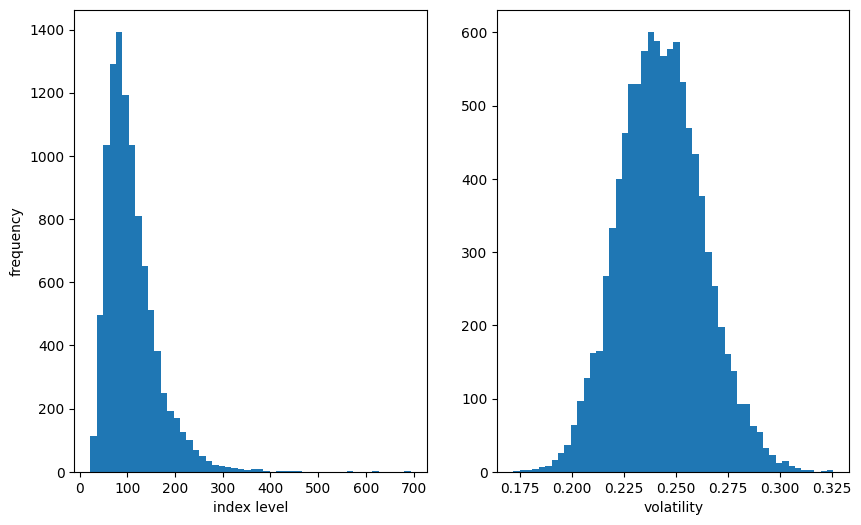

In [12]:
# Considere la siguiente parametrización del modelo.
# Para tener en cuenta la correlación entre los dos procesos estocásticos,
# es necesario determinar la descomposición de Cholesky de la matriz de correlación:

S0 = 100
r = 0.05
v0 = 0.1   # Iniciar la Volatilidad
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6   # Fijar la correlación entre los dos movs Brownianos
T = 1.0

corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)  # Descomposición de Cholesky
cho_mat


# Simulación
M = 50
I = 10000
dt = T / M

ran_num = npr.standard_normal((2, M + 1, I))  # Genera números aleatorios en 3D
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0

for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt) * ran[1])
    v = np.maximum(vh, 0)

S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
ax1.hist(S[-1], bins = 50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins = 50)
ax2.set_xlabel('volatility');


# Esto ilustra otra ventaja de trabajar con el esquema de Euler para la difusión de raíz cuadrada:
# la correlación se tiene en cuenta de manera fácil y consistente ya que solo se extraen números aleatorios estándar distribuidos normalmente.
# No existe una forma sencilla de lograr lo mismo con un enfoque mixto (es decir,
# utilizando Euler para el índice y el enfoque exacto no central basado en chi-cuadrado para el proceso de volatilidad).

In [13]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         22.789          0.172
           max        693.760          0.326
          mean        108.683          0.243
           std         52.451          0.020
          skew          1.710          0.165
      kurtosis          6.157          0.025


Text(0, 0.5, 'volatility')

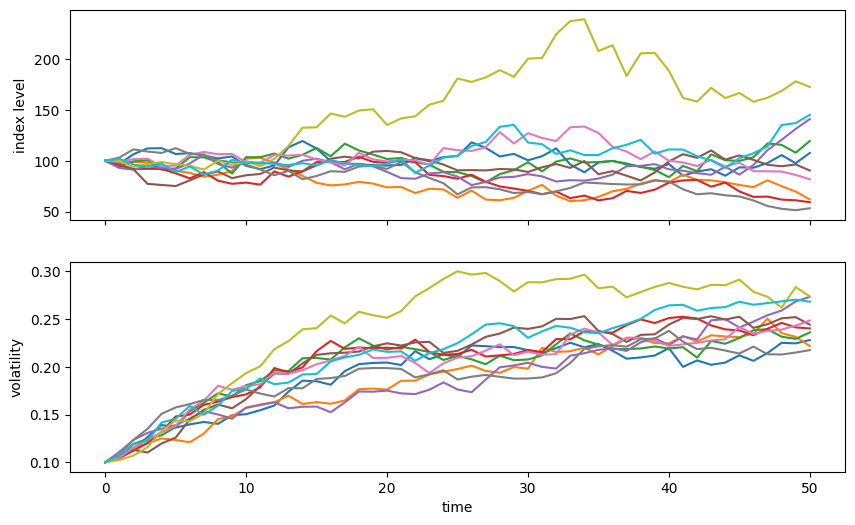

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (10, 6))
ax1.plot(S[:, :10], lw = 1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw = 1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')

# Una mirada breve a las estadísticas de la fecha de vencimiento de ambos conjuntos de datos revela un valor máximo bastante alto
# para el proceso a nivel de índice. De hecho, esto es mucho más alto de lo que un movimiento browniano geométrico con volatilidad constante podría alcanzar,
# ceteris paribus.

## Difusión de salto

La volatilidad estocástica y el efecto apalancamiento son hechos estilizados (empíricos) que se encuentran en varios mercados. Otro hecho estilizado importante es la existencia de saltos en los precios de los activos y, por ejemplo, de la volatilidad. En 1976, Merton publicó su modelo de difusión de saltos, mejorando la configuración de Black-Scholes-Merton a través de un componente del modelo que genera saltos con distribución log-normal. La SDE neutral al riesgo se presenta en:

### Ecuación diferencial estocástica para el modelo de difusión por salto de Merton

$dS_t =(r–r_j)S_tdt+\sigma S_tdZ_t +J_tS_tdN_t \\$
* $S_t$: Nivel del índice en la fecha t
* $r$: Tasa corta constante y sin riesgo
* $r_j \equiv \lambda \cdot (e^{\mu_j + \delta^2/2}-1) $: Corrección de la deriva del salto para mantener la neutralidad del riesgo
* $\sigma$: constante de volatilidad de S
* $Z_t$: Movimiento Browniano estándar
* $J_t$: salto de la fecha $t$ con distribución:
    * ...$log(1+J_t)\approx N(log(1+\mu_j)-\frac{\delta^2}{2},\delta^2)$ con...
    * ... $N$ como la Fn de Distrib Acumulada de una v.a. Normal estándar
* $N_t$: Proceso Poisson con intensidad $\lambda$

### Discreta de Euler para Difusión de salto
$S_t=S_{t-\Delta t}(e^{(r-r_j- \delta^2/2){\Delta t}+\sigma \sqrt{\Delta t}z_t^1}+(e^{\mu_j+\delta z_t^2}-1)y_t)$

Text(0, 0.5, 'frequency')

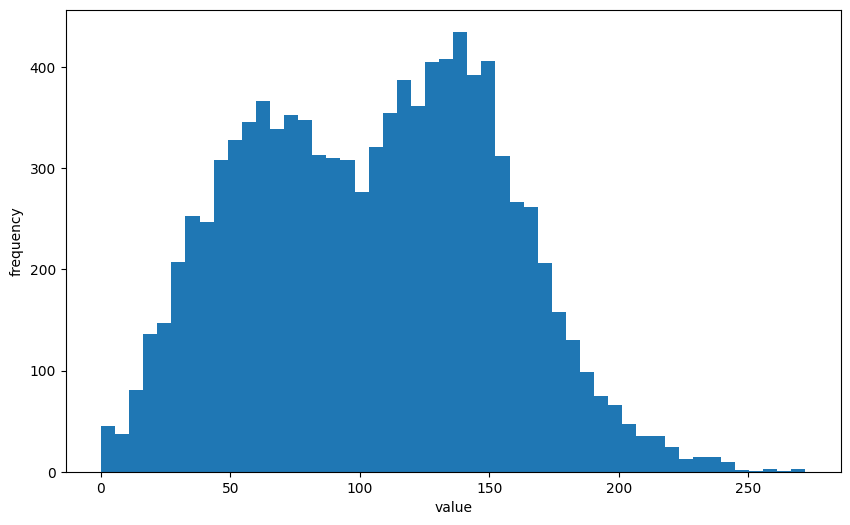

In [15]:
S0 = 100
r = 0.05
sigma = 0.2
lamb = 0.75   # intensidad del salto
mu = -0.6     # media del tamaño del salto
delta = 0.25  # volatilidad del salto
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)   # corrección de la deriva

T = 1.0
M = 50
I = 10000
dt = T / M

S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))  # #s aleatorios con ~N estándar
sn2 = npr.standard_normal((M + 1, I))  # #s aleatorios con ~N estándar
poi = npr.poisson(lamb * dt, (M + 1, I))  # #s aleatorios con ~Poisson
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn1[t]) + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    S[t] = np.maximum(S[t], 0)

plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

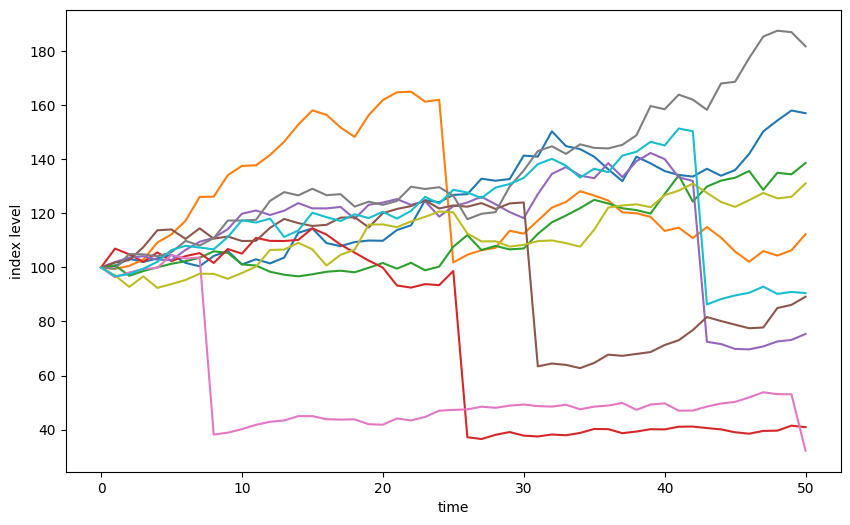

In [16]:
plt.figure(figsize = (10, 6))
plt.plot(S[:, :10], lw = 1.5)
plt.xlabel('time')
plt.ylabel('index level')

## Reducción de Varianza $\sigma$

Debido a que las funciones de Python utilizadas hasta ahora generan números pseudoaleatorios y debido a los diferentes tamaños de las muestras extraídas, es posible que los conjuntos de números resultantes no muestren estadísticas lo suficientemente cercanas a las esperadas o deseadas. Por ejemplo, uno esperaría que un conjunto de números aleatorios estándar distribuidos normalmente mostrara una media de 0 y una desviación estándar de 1. Comprobemos qué estadísticas exhiben diferentes conjuntos de números aleatorios. Para lograr una comparación realista, el valor inicial para el generador de números aleatorios es fijo:

In [17]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

i ** 2 * 10000

# Los resultados muestran que las estadísticas “de alguna manera”
# mejoran cuanto mayor es el número de sorteos.2 Pero todavía no coinciden con los deseados,
# incluso en nuestra muestra más grande con más de 8.000.000 de números aleatorios.

           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


8410000

## Valuación

Una de las aplicaciones más importantes de la simulación Monte Carlo es la valoración de derechos contingentes (opciones, derivados, instrumentos híbridos, etc.). En pocas palabras, en un mundo neutral al riesgo, el valor de un reclamo contingente es el pago esperado descontado según la medida neutral al riesgo (martingala). Esta es la medida de probabilidad que hace que todos los factores de riesgo (acciones, índices, etc.) fluctúen al tipo corto sin riesgo, convirtiendo los procesos de descuento en martingalas. Según el Teorema Fundamental de la Fijación del Precio de los Activos, la existencia de tal medida de probabilidad equivale a la ausencia de arbitraje.
$//$
Una opción financiera incorpora el derecho a comprar (opción de compra) o vender (opción de venta) un instrumento financiero específico en una fecha de vencimiento determinada (opción europea), o durante un período de tiempo específico (opción americana), a un precio determinado. (precio de ejercicio). Consideremos primero el caso más simple de las opciones europeas en términos de valoración.

### Valuaciones Europeas
El pago de una opción de compra europea sobre un índice al vencimiento viene dado por h(ST) ≡ max(ST – K, 0), donde ST es el nivel del índice en la fecha de vencimiento T y K es el precio de ejercicio. Dada una medida neutral al riesgo, o en mercados completos, la medida neutral al riesgo para el proceso estocástico relevante (por ejemplo, movimiento browniano geométrico), el precio de dicha opción viene dado por la fórmula de la ecuación 12-10:

### Fijación de precios según expectativa neutral al riesgo
$C_0=e^{rT}\textbf\displaystyle{E}_0^Q(h(S_t))=e^{rT} \displaystyle \int_{0}^\infty{h(s)q(s)ds}$

### Estimador Monte Carlo neutral al riesgo para valuación europea
$\tilde{C_0}=e^{-rT}\frac{1}{I} \displaystyle \sum_{i=1}^I{h( \tilde{S}_T^i)}$


In [30]:
S0 = 100
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

# La siguiente función utiliza la información con respecto a las técnicas de reducción de varianza
# y genera números aleatorios normales estándar para la simulación de procesos utilizando dos,
# una o ninguna técnica de reducción de varianza
def gen_sn(M, I, anti_paths=True, mo_match=True):
# Function to generate random numbers for simulation.
# Parameters
# ==========
# M: int
#     number of time intervals for discretization
# I: int
#     number of paths to be simulated
# anti_paths: boolean
#     use of antithetic variates
# mo_math: boolean
#     use of moment matching
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn


# Geometric Brownian Motion and the valuation function with a strike price of K = 105
def gbm_mcs_stat(K):
    # Valuation of European call option in Black-Scholes-Merton by Monte Carlo simulation (of index level at maturity)
    # Parameters
    # ==========
    # K: float
    #     (positive) strike price of the option
    # Returns
    # =======
    # C0: float
    #     estimated present value of European call option
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * sn[1]) # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0


gbm_mcs_stat(K=105.) ## The Monte Carlo estimator value for the European call option.


# A continuación, considere el enfoque de simulación dinámica y permita opciones de venta europeas
# además de la opción de compra. La función gbm_mcs_dyna() implementa el algoritmo.
# El código también compara las estimaciones del precio de las opciones para una opción call y put al mismo nivel:

M = 50 # The number of time intervals for the discretization.


def gbm_mcs_dyna(K, option='call'):
# ''' Valuation of European options in Black-Scholes-Merton by Monte Carlo simulation (of index level paths)
#                  Parameters
#                  ==========
#                  K: float
#                      (positive) strike price of the option
#                  option : string
#                      type of the option to be valued ('call', 'put')
#                  Returns
#                  =======
#                  C0: float
#                      estimated present value of European call option
#                  '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t]) # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0) # calculation of MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

price_call = gbm_mcs_dyna(K = 110, option = 'call')

price_put = gbm_mcs_dyna(K = 110., option = 'put')

print("Price call is: " + str(price_call)) # The Monte Carlo estimator value for the European call option.
print("Price put is: " + str(price_put)) # The Monte Carlo estimator value for the European put option.

## En la página 392 está el método analítico para valuaciones


Price call is: 8.075290744649074
Price put is: 12.646896363264913


In [ ]:
## Simulación de una martingala

import numpy as np
import matplotlib.pyplot as plt

# Número de pasos en la simulación
n_steps = 1000

# Secuencia de pasos de la martingala
X = np.zeros(n_steps)
for t in range(1, n_steps):
    X[t] = X[t - 1] + np.random.choice([-1, 1])

# Graficar la secuencia
plt.plot(X)
plt.title('Simulación de una Martingala')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

### Valuaciones americanas

La valuación de las opciones americanas es más complicada en comparación con las opciones europeas. En este caso, se debe resolver un problema de parada óptima para obtener un valor justo de la opción. La sig ecuación formula la valuación de una opción estadounidense como tal problema. La formulación del problema ya se basa en una cuadrícula de tiempo discreta para su uso con simulación numérica. En cierto sentido, es más correcto hablar de un valor de opción dado el ejercicio de las Bermudas. Para el intervalo de tiempo que converge a longitud cero, el valor de la opción de Bermudas converge al de la opción americana.

### Los precios de las opciones americanas como problema de parada óptima
$V_0=\underset{{\tau \in{\{0,\Delta t,2\Delta t,\dots,T\}}}}{sup} \space e^{-rT}\textbf\displaystyle{E}_0^Q(h_\tau(S_\tau))$

El algoritmo que se describe a continuación se llama Monte Carlo de mínimos cuadrados (LSM).

### Regresión de mínimos cuadrados para la valuación de opciones estadounidenses
$\underset{\alpha_{1,t},\dots,\alpha_{D,t}}{min}\frac{1}{I}$